# K-Means Clustering

## Data Loading & Pre-processing

In [1]:
import pandas as pd
import numpy as np
import csv

df = pd.read_csv(r"CSE575-HW03-Data.csv", header=None)
# replace the missing entry with the mean of that feature
df = df.fillna(df.mean())
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,92.9894,-9.6430,-4.6412,-6.8569,-5.2263,-4.9604,2.3191,-0.4579,0.5685,1.8047,2.6274,5.2223,6.5404
1,73.4054,6.5269,-6.6736,0.5054,-4.4818,-5.1157,-6.3784,1.6296,-3.3999,0.0652,-2.5042,1.7626,-1.0612
2,94.6334,-4.5986,-12.4970,-6.3137,-6.7072,-7.4690,-6.7463,-3.6960,-3.4587,-1.4178,-1.3265,1.8756,0.6391
3,89.1135,-2.2287,0.2304,-2.7300,-0.9133,-1.9530,-1.0086,0.1486,2.0624,1.1938,-1.0113,0.1567,-1.2346
4,76.1929,2.5222,9.1796,4.3947,6.6885,4.0074,1.9488,2.2791,-0.2567,2.8208,-2.9867,-3.6861,-2.2471


## K-Means Implementation

In [16]:
from numpy.random.mtrand import f
import numpy as np

def k_means(df, k, max_iterations=100):

  data = df.to_numpy()
  data_labels = np.zeros(data.shape[0])

  # Step 1: choose some initial values for cluster centers
  centers = data[np.random.choice(data.shape[0], k, replace=False)]

  for i in range(max_iterations):

    # Step 2: Calculate distance from cluster center to data
    distances = np.zeros((data.shape[0], k))
    for j in range(k):
      # euclidean distance from data point to center
      distances[:, j] = np.linalg.norm(data - centers[j], axis=1)

    # Step 3: Assign data points to closest clusters
    new_data_labels = np.argmin(distances, axis=1)
    # terminate if cluster assignment remains unchanged
    if np.array_equal(data_labels, new_data_labels):
      break
    data_labels = new_data_labels

    # Step 4: Compute new cluster centers
    for j in range(k):
      centers[j] = np.mean(data[data_labels == j], axis=0)

    # Print cluster assignment
    print(f"\nITERATION {i+1}")
    for j in range(k):
        cluster_indices = np.where(data_labels == j)[0]
        print(f"\n\tCluster {j}: {len(cluster_indices)} points")

  # Step 5: Calculate Objective Function (Sum of Squared Errors) value
  sse = 0
  for i in range(k):
    # Skip if no data points in cluster
    if len(data[data_labels == i]) == 0:
      continue
    sse += np.sum(np.linalg.norm(data[data_labels == i] - centers[i], axis=1) ** 2)
  print(f"SSE: {sse}")

  return data_labels, centers, sse

In [17]:
k_values = range(2,10)
sse_values = []

for k in k_values:
  data_labels, centers, sse = k_means(df, k)
  sse_values.append(sse)


ITERATION 1

	Cluster 0: 20 points

	Cluster 1: 108 points

ITERATION 2

	Cluster 0: 38 points

	Cluster 1: 90 points

ITERATION 3

	Cluster 0: 53 points

	Cluster 1: 75 points

ITERATION 4

	Cluster 0: 58 points

	Cluster 1: 70 points

ITERATION 5

	Cluster 0: 63 points

	Cluster 1: 65 points

ITERATION 6

	Cluster 0: 65 points

	Cluster 1: 63 points

ITERATION 7

	Cluster 0: 66 points

	Cluster 1: 62 points
SSE: 17488.957285790137
SSE for k=2: 17488.957285790137

ITERATION 1

	Cluster 0: 47 points

	Cluster 1: 36 points

	Cluster 2: 45 points

ITERATION 2

	Cluster 0: 49 points

	Cluster 1: 50 points

	Cluster 2: 29 points

ITERATION 3

	Cluster 0: 45 points

	Cluster 1: 54 points

	Cluster 2: 29 points

ITERATION 4

	Cluster 0: 33 points

	Cluster 1: 56 points

	Cluster 2: 39 points

ITERATION 5

	Cluster 0: 26 points

	Cluster 1: 54 points

	Cluster 2: 48 points

ITERATION 6

	Cluster 0: 27 points

	Cluster 1: 54 points

	Cluster 2: 47 points

ITERATION 7

	Cluster 0: 27 points

	

## Plot the graphs

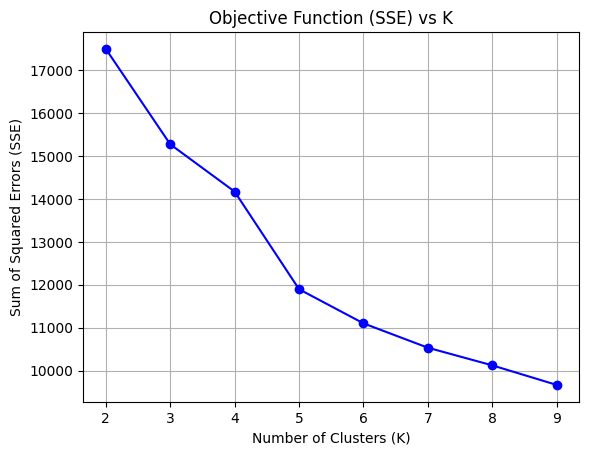

In [19]:
import matplotlib.pyplot as plt

# Objective Function vs K
plt.plot(k_values, sse_values, 'o-', color='b')
plt.title('Objective Function (SSE) vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)


ITERATION 1

	Cluster 0: 88 points

	Cluster 1: 40 points

ITERATION 2

	Cluster 0: 75 points

	Cluster 1: 53 points

ITERATION 3

	Cluster 0: 70 points

	Cluster 1: 58 points

ITERATION 4

	Cluster 0: 65 points

	Cluster 1: 63 points

ITERATION 5

	Cluster 0: 63 points

	Cluster 1: 65 points

ITERATION 6

	Cluster 0: 62 points

	Cluster 1: 66 points
SSE: 17488.957285790137


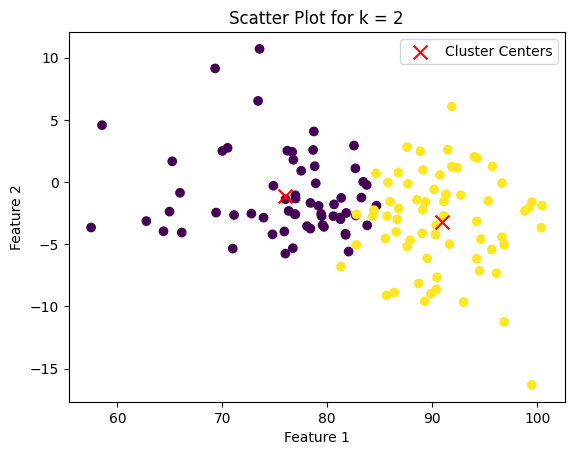

In [23]:
import matplotlib.pyplot as plt

k2_data_labels, k2_centers ,_ = k_means(df, 2)

# Scatter plot for k = 2
plt.scatter(df[0], df[1], c=k2_data_labels, cmap='viridis')
plt.scatter(k2_centers[:, 0], k2_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('Scatter Plot for k = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()